#### **SQL Database Design and Querying for a Library Management System**

##### **ER Diagram**

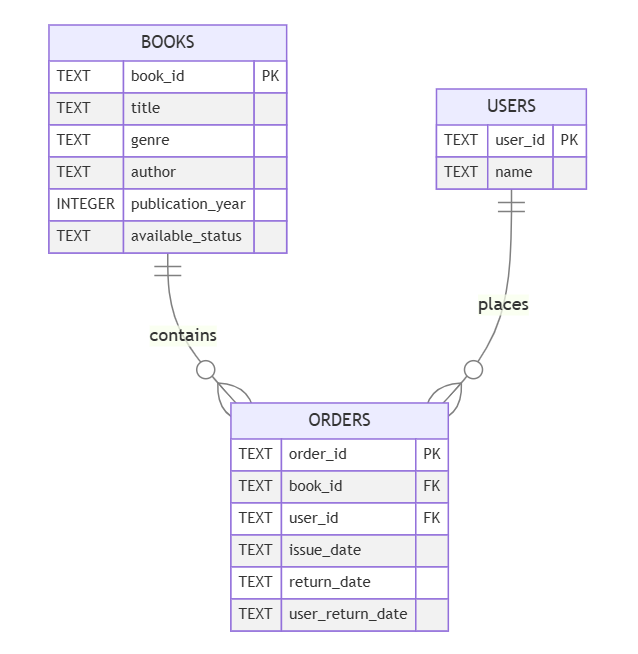

**TABLES**

**BOOKS**

**Attributes:**


```
book_id (TEXT, Primary Key): Unique identifier for each book.
title (TEXT): Title of the book.
genre (TEXT): Genre of the book.
author (TEXT): Author of the book.
publication_year (INTEGER): Year of publication of the book.
available_status (TEXT): Status indicating whether the book is available or not.
```


**USERS**

**Attributes:**



```
user_id (TEXT, Primary Key): Unique identifier for each user.
name (TEXT): Name of the user.
```



**ORDERS**

**Attributes:**


```
order_id (TEXT, Primary Key): Unique identifier for each order.
book_id (TEXT, Foreign Key referencing BOOKS): ID of the book ordered.
user_id (TEXT, Foreign Key referencing USERS): ID of the user who placed the order.
issue_date (TEXT): Date when the book was issued to the user.
return_date (TEXT): Expected return date of the book.
user_return_date (TEXT): Actual date when the user returned the book.
```


**RELATIONSHIPS**

**BOOKS and ORDERS**

Type: Many-to-Many

Cardinality: N:M

Description:
* A book can be ordered by multiple users, and a user can order multiple books. This relationship is implemented through a junction table, ORDERS.

**USERS and ORDERS**

Type: One-to-Many

Cardinality: 1:N

Description:
* A user can place multiple orders, but each order is associated with only one user.

##### **Import Required Libraries**

In [1]:
import sqlite3
import pandas as pd



##### **Database Creation**

In [2]:
conn = sqlite3.connect('lms_db.db') # Database Creation
cursor = conn.cursor() # Cursor to connect with Database

##### **Table Creation**

In [3]:
# TABLES
# 1. Create table "books"
cursor.execute(
    '''
    CREATE TABLE IF NOT EXISTS books (
        book_id TEXT PRIMARY KEY,
        title TEXT,
        genre TEXT ,
        author TEXT ,
        publication_year INTEGER ,
        available_status TEXT DEFAULT 'YES'

    )
    '''
)

# 2. Create table "users"
cursor.execute(
    '''
    CREATE TABLE IF NOT EXISTS users (
        user_id TEXT PRIMARY KEY,
        name TEXT
    )
    '''
)

# 3. Create table "orders"
cursor.execute(
    '''
    CREATE TABLE IF NOT EXISTS orders (
        order_id TEXT PRIMARY KEY,
        book_id TEXT ,
        user_id TEXT ,
        issue_date TEXT ,
        return_date TEXT ,
        user_return_date TEXT ,
        foreign key (book_id) references books(book_id) on delete cascade,
        foreign key (user_id) references users(user_id) on delete cascade
    )
    '''
)

conn.commit()

##### **Data Ingestion (or) Insert Data into Tables**

In [4]:
# Insert Rows
# 1. Insert Rows into "books" table
cursor.execute(
    '''
    INSERT INTO books (book_id, title, genre, author, publication_year, available_status)
VALUES
    ('B001', 'The Great Adventure', 'Adventure', 'John Smith', 2010, 'NO'),
    ('B002', 'The Mystery of the Lost City', 'Mystery', 'Jane Doe', 2015, 'NO'),
    ('B003', 'Romance in Paris', 'Romance', 'Emily White', 2018, 'NO'),
    ('B004', 'Science and Innovation', 'Science', 'Charles Thompson', 2020, 'NO'),
    ('B005', 'Historical Secrets', 'History', 'William Green', 2008, 'NO'),
    ('B006', 'Deep Sea Explorations', 'Science', 'Jessica Black', 2017, 'NO'),
    ('B007', 'The Final Countdown', 'Thriller', 'David Johnson', 2012, 'NO'),
    ('B008', 'Modern Architecture', 'Architecture', 'Sandra Lee', 2019, 'NO'),
    ('B009', 'Poems of the Heart', 'Poetry', 'John Smith', 2016, 'NO'),
    ('B010', 'Through the Wilderness', 'Adventure', 'Michael Clark', 2011, 'NO'),
    ('B011', 'Tales of the Wild West', 'Western', 'Sarah Miller', 2005, 'NO'),
    ('B012', 'The Quantum Theory', 'Science Fiction', 'James Wilson', 2021, 'NO'),
    ('B013', 'The Secret Garden', 'Drama', 'Charlotte Harris', 2000, 'NO'),
    ('B014', 'A Journey Through Time', 'Fantasy', 'George Evans', 2014, 'NO'),
    ('B015', 'The Last Kingdom', 'Historical Fiction', 'Hannah Turner', 2013, 'NO'),
    ('B016', 'Space and Beyond', 'Sci-Fi', 'John Smith', 2022, 'NO'),
    ('B017', 'Under the Moonlight', 'Romance', 'Olivia Scott', 2017, 'NO'),
    ('B018', 'The Cold War', 'History', 'Arthur Hall', 2002, 'NO'),
    ('B019', 'The Silent Ocean', 'Thriller', 'Maria Garcia', 2018, 'NO'),
    ('B020', 'Journey to the Stars', 'Adventure', 'Kevin Adams', 2023, 'NO'),
    ('B021', 'The Golden Years', 'Historical Fiction', 'Anna Roberts', 1999, 'YES'),
    ('B022', 'Love and Friendship', 'Romance', 'Sophia Young', 2015, 'YES'),
    ('B023', 'The Future of AI', 'Science', 'Matthew White', 2020, 'YES'),
    ('B024', 'The Mystery of Shadows', 'Mystery', 'Daniel Carter', 2021, 'YES'),
    ('B025', 'Nature’s Wonders', 'Science', 'Lily Taylor', 2016, 'YES'),
    ('B026', 'The Art of Painting', 'Art', 'James Miller', 2009, 'YES'),
    ('B027', 'Philosophy for the Modern Age', 'Philosophy', 'John Smith', 2018, 'YES'),
    ('B028', 'The Philosopher’s Stone', 'Fantasy', 'William Adams', 2012, 'YES'),
    ('B029', 'Exploring New Worlds', 'Science Fiction', 'Charles Thompson', 2021, 'YES'),
    ('B030', 'Journey Through History', 'History', 'Charles Thompson', 2023, 'YES')
    '''
)

# 2. Insert Rows into "users" table
cursor.execute(
    '''
    INSERT INTO users (user_id, name) VALUES
('user_001', 'Alice Johnson'),
('user_002', 'Bob Smith'),
('user_003', 'Charlie Brown'),
('user_004', 'David Williams'),
('user_005', 'Eva Davis'),
('user_006', 'Frank Miller'),
('user_007', 'Grace Wilson'),
('user_008', 'Hannah Moore'),
('user_009', 'Ian Taylor'),
('user_010', 'Jack Anderson'),
('user_011', 'Kathy Thomas'),
('user_012', 'Liam Jackson'),
('user_013', 'Mona White'),
('user_014', 'Nathan Harris'),
('user_015', 'Olivia Martin'),
('user_016', 'Peter Lee'),
('user_017', 'Quinn Clark'),
('user_018', 'Rachel Lewis'),
('user_019', 'Sam Robinson'),
('user_020', 'Tina Walker'),
('user_021', 'Uma Green'),
('user_022', 'Vera Young'),
('user_023', 'Walter Adams'),
('user_024', 'Xena King'),
('user_025', 'Yara Scott'),
('user_026', 'Zane Carter'),
('user_027', 'Abigail Turner'),
('user_028', 'Ben Mitchell'),
('user_029', 'Catherine Perez'),
('user_030', 'Daniel Campbell')
 '''
)

# 3. Insert Rows into "orders" table
cursor.execute(
    '''
    INSERT INTO orders (order_id, book_id, user_id, issue_date, return_date, user_return_date) VALUES
('O001', 'B001', 'user_001', '2025-01-01', '2025-02-01', '2025-01-30'),
('O002', 'B002', 'user_002', '2025-01-02', '2025-02-02', '2025-01-31'),
('O003', 'B003', 'user_003', '2025-01-03', '2025-02-03', '2025-02-01'),
('O004', 'B004', 'user_004', '2025-01-04', '2025-02-04', '2025-02-02'),
('O005', 'B005', 'user_005', '2025-01-05', '2025-02-05', '2025-02-03'),
('O006', 'B006', 'user_006', '2025-01-06', '2025-02-06', '2025-02-04'),
('O007', 'B007', 'user_007', '2025-01-07', '2025-02-07', '2025-02-05'),
('O008', 'B008', 'user_008', '2025-01-08', '2025-02-08', '2025-02-06'),
('O009', 'B009', 'user_009', '2025-01-09', '2025-02-09', '2025-02-07'),
('O010', 'B010', 'user_010', '2025-01-10', '2025-02-10', '2025-02-08'),
('O011', 'B011', 'user_011', '2025-01-11', '2025-02-11', '2025-02-09'),
('O012', 'B012', 'user_012', '2025-01-12', '2025-02-12', '2025-02-10'),
('O013', 'B013', 'user_013', '2025-01-13', '2025-02-13', '2025-02-11'),
('O014', 'B014', 'user_014', '2025-01-14', '2025-02-14', '2025-02-12'),
('O015', 'B015', 'user_015', '2025-01-15', '2025-02-15', '2025-02-13'),
('O016', 'B016', 'user_016', '2025-01-16', '2025-02-16', '2025-02-14'),
('O017', 'B017', 'user_017', '2025-01-17', '2025-02-17', '2025-02-15'),
('O018', 'B018', 'user_018', '2025-01-18', '2025-02-18', '2025-02-16'),
('O019', 'B019', 'user_019', '2025-01-19', '2025-02-19', '2025-02-17'),
('O020', 'B020', 'user_020', '2025-01-20', '2025-02-20', '2025-02-18') ,
('O021', 'B007', 'user_008', '2013-01-01', '2013-02-01', '2013-01-30'),
('O022', 'B019', 'user_015', '2013-01-02', '2013-02-02', '2013-01-31'),
('O023', 'B003', 'user_019', '2013-01-03', '2013-02-03', '2013-02-01'),
('O024', 'B015', 'user_012', '2013-01-04', '2013-02-04', '2013-02-02'),
('O025', 'B010', 'user_017', '2013-01-05', '2013-02-05', '2013-02-03'),
('O026', 'B002', 'user_003', '2013-01-06', '2013-02-06', '2013-02-04'),
('O027', 'B008', 'user_005', '2013-01-07', '2013-02-07', '2013-02-05'),
('O028', 'B017', 'user_009', '2013-01-08', '2013-02-08', '2013-02-06'),
('O029', 'B014', 'user_020', '2013-01-09', '2013-02-09', '2013-02-07'),
('O030', 'B004', 'user_010', '2013-01-10', '2013-02-10', '2013-02-08'),
('O031', 'B005', 'user_001', '2024-01-01', '2024-02-02', '2024-01-30'),
('O032', 'B010', 'user_002', '2024-01-02', '2024-02-03', '2024-01-31'),
('O033', 'B015', 'user_003', '2024-01-03', '2024-02-05', '2024-02-01'),
('O034', 'B004', 'user_004', '2024-01-04', '2024-02-06', '2024-02-02'),
('O035', 'B001', 'user_005', '2024-01-05', '2024-02-07', '2024-02-03'),
('O036', 'B009', 'user_006', '2024-01-06', '2024-02-08', '2024-02-04'),
('O037', 'B006', 'user_007', '2024-01-07', '2024-02-09', '2024-02-05'),
('O038', 'B020', 'user_008', '2024-01-08', '2024-02-10', '2024-02-06'),
('O039', 'B012', 'user_009', '2024-01-09', '2024-02-12', '2024-02-07'),
('O040', 'B017', 'user_010', '2024-01-10', '2024-02-13', '2024-02-08'),
('O041', 'B013', 'user_011', '2024-01-11', '2024-02-14', '2024-02-09'),
('O042', 'B003', 'user_012', '2024-01-12', '2024-02-15', '2024-02-10'),
('O043', 'B008', 'user_013', '2024-01-13', '2024-02-16', '2024-02-11'),
('O044', 'B016', 'user_014', '2024-01-14', '2024-02-17', '2024-02-12'),
('O045', 'B018', 'user_015', '2024-01-15', '2024-02-18', '2024-02-13'),
('O046', 'B014', 'user_016', '2024-01-16', '2024-02-19', '2024-02-14'),
('O047', 'B002', 'user_017', '2024-01-17', '2024-02-20', '2024-02-15'),
('O048', 'B007', 'user_018', '2024-01-18', '2024-02-21', '2024-02-16'),
('O049', 'B005', 'user_019', '2024-01-19', '2024-02-22', '2024-02-17'),
('O050', 'B019', 'user_020', '2024-01-20', '2024-02-23', '2024-02-18'),
('O051', 'B010', 'user_001', '2024-01-21', '2024-02-24', '2024-02-19'),
('O052', 'B001', 'user_002', '2024-01-22', '2024-02-25', '2024-02-20'),
('O053', 'B017', 'user_003', '2024-01-23', '2024-02-26', '2024-02-21'),
('O054', 'B003', 'user_004', '2024-01-24', '2024-02-27', '2024-02-22'),
('O055', 'B016', 'user_005', '2024-01-25', '2024-02-28', '2024-02-23'),
('O056', 'B006', 'user_006', '2024-01-26', '2024-02-29', '2024-02-24'),
('O057', 'B020', 'user_007', '2024-01-27', '2024-03-01', '2024-02-25'),
('O058', 'B018', 'user_008', '2024-01-28', '2024-03-02', '2024-02-26'),
('O059', 'B005', 'user_009', '2024-01-29', '2024-03-03', '2024-02-27'),
('O060', 'B014', 'user_010', '2024-01-30', '2024-03-04', '2024-02-28'),
('O061', 'B011', 'user_011', '2024-01-31', '2024-03-05', '2024-03-01'),
('O062', 'B007', 'user_012', '2024-02-01', '2024-03-06', '2024-03-02'),
('O063', 'B008', 'user_013', '2024-02-02', '2024-03-07', '2024-03-15'),
('O064', 'B009', 'user_014', '2024-02-03', '2024-03-08', '2024-03-25'),
('O065', 'B015', 'user_015', '2024-02-04', '2024-03-09', '2024-03-20'),
('O066', 'B004', 'user_016', '2024-02-05', '2024-03-10', '2024-03-16'),
('O067', 'B012', 'user_017', '2024-02-06', '2024-03-11', '2024-03-07'),
('O068', 'B016', 'user_018', '2024-02-07', '2024-03-12', '2024-03-25'),
('O069', 'B013', 'user_019', '2024-02-08', '2024-03-13', '2024-03-20'),
('O070', 'B019', 'user_020', '2024-02-09', '2024-03-14', '2024-03-15')
'''
)

conn.commit()

##### **Query the Tables**

###### **1: Retrieve the top 5 most-issued books with their issue count.**

In [5]:
query = '''
select distinct
book_id , count(distinct order_id) issue_count
from orders
group by 1
order by 2 desc
limit 5
'''

pd.read_sql_query(query , conn)

,book_id,issue_count
0,B019,4
1,B017,4
2,B016,4
3,B015,4
4,B014,4


###### **2: List books along with their authors that belong to the "Fantasy" genre, sorted by publication year in descending order.**

In [6]:
query = '''
select distinct
book_id , author , genre , publication_year
from books
where genre = 'Fantasy'
order by publication_year desc
'''

pd.read_sql_query(query , conn)

,book_id,author,genre,publication_year
0,B014,George Evans,Fantasy,2014
1,B028,William Adams,Fantasy,2012


###### **3: Identify the top 3 customers who have borrowed the most books.**

In [7]:
query = '''
select distinct
user_id , count(distinct order_id) issue_count , count(distinct book_id) books_count
from orders
group by 1
order by 3 desc
limit 3
'''

pd.read_sql_query(query , conn)

,user_id,issue_count,books_count
0,user_019,4,4
1,user_017,4,4
2,user_012,4,4


###### **4: List all customers who have overdue books (assume overdue if ReturnDate is null and IssueDate is older than 30 days).**

In [8]:
query = '''
select distinct
user_id
from orders
where  return_date is null
or JULIANDAY(user_return_date) - JULIANDAY(issue_date) > 30
limit 5
'''

pd.read_sql_query(query , conn)

,user_id
0,user_013
1,user_014
2,user_015
3,user_016
4,user_018


###### **5: Find authors who have written more than 3 books.**

In [9]:
query = '''
select distinct
author , count(distinct book_id) book_count
from books
group by 1
having count(distinct book_id) > 3
order by 2 desc
limit 3
'''

pd.read_sql_query(query , conn)

,author,book_count
0,John Smith,4


###### **6: Retrieve a list of authors who have books issued in the last 6 months.**

In [10]:
query = '''
with mytable as (
  select distinct book_id
  from orders
  where issue_date >= DATE('now', '-6 months')
)
select distinct
B.author author
from books B
join mytable M
on B.book_id = M.book_id
'''

pd.read_sql_query(query , conn)

,author
0,John Smith
1,Jane Doe
2,Emily White
3,Charles Thompson
4,William Green
5,Jessica Black
6,David Johnson
7,Sandra Lee
8,Michael Clark
9,Sarah Miller


###### **7. Calculate the total number of books currently issued and the percentage of books issued compared to the total available.**

In [11]:
query = '''
with mytable as (
  select distinct
  sum(case when available_status='NO' then 1 else 0 end) issue_count ,
  count(distinct book_id) total_books
  from books
)
select distinct
* , ((issue_count * 100) / total_books ) percentage_of_books_issued
from mytable
'''

pd.read_sql_query(query , conn)

,issue_count,total_books,percentage_of_books_issued
0,20,30,66


###### **8. Generate a monthly report of issued books for the past year, showing month, book count, and unique customer count.**

In [12]:
query = '''
select distinct
strftime('%Y-%m', issue_date) AS month,
count(*) book_count ,
count(distinct user_id) unique_users_count
from orders
where issue_date >= DATE('now', '-1 year')
group by 1
order by 1
'''

pd.read_sql_query(query , conn)

,month,book_count,unique_users_count
0,2024-01,7,7
1,2024-02,9,9
2,2025-01,20,20


###### **9: Add appropriate indexes to optimize queries.**

###### **10:Analyze query execution plans for at least two queries using EXPLAIN and write your understanding from execution query plan in your words.**

1.Generate a monthly report of issued books for the past year, showing month, book count, and unique customer count.

Query

```
select distinct
strftime('%Y-%m', issue_date) AS month,
count(*) book_count ,
count(distinct user_id) unique_users_count
from orders
where issue_date >= DATE('now', '-1 year')
group by 1
order by 1
```


*   As per the given question we have to find monthly wise  books issue count and different users count in past year .
*  "strftime('%Y-%m', issue_date)" is used to extract year-month .
*  "count(*)" is used to get the count of books .
*  "count(distinct user_id)" is used to get different users count .
*  "issue_date >= DATE('now', '-1 year')" is to used to filter the rows where issue_date lies in the past year .
* "group by" is used to get the aggregation values like count , sum , max , min , avg .
* "group by 1" means it groups the aggregated columns by the first column in the query .






2.Calculate the total number of books currently issued and the percentage of books issued compared to the total available.

Query

```
with mytable as (
  select distinct
  sum(case when available_status='NO' then 1 else 0 end) issue_count ,
  count(distinct book_id) total_books
  from books
)
select distinct
* , ((issue_count * 100) / total_books ) percentage_of_books_issued
from mytable
```


*  In the above query , I used common tabe expression for accessability of columns further anywhere in the query .
* "sum(case when available_status='NO' then 1 else 0 end)" this statement gives the total books that are issued .
  *  where available_status = NO means currently that book is issued  .
  *  where available_status = Yes means currently that book is available in library .
* "count(distinct book_id)" this statement is used to get the actual total books belongs to the library .


